## 1: Face Recognition, but not evil this time

Using the faces dataset in:

```
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
```

If you use the `faces.target` and `faces.target_names` attributes, you can build a facial recognition algorithm.

Use sklearn **gridsearch** (or an equivalent, like random search) to optimize the model for accuracy. Try both a SVM-based classifier and a logistic regression based classifier (with a feature pipeline of your choice) to get the best model. You should have at least 80% accuracy.

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [2]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
X = faces.data
y = faces.target

In [4]:
faces.data[0].shape

(2914,)

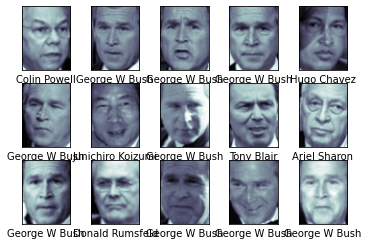

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [6]:
# results were garbo until whiten=True implemented
pca = PCA(n_components=150, random_state=42, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)
grid.fit(Xtrain, ytrain)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [7]:
model = grid.best_estimator_
ypred = model.predict(Xtest)

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69        15
           1       0.80      0.87      0.83        68
           2       0.74      0.84      0.79        31
           3       0.92      0.83      0.88       126
           4       0.86      0.83      0.84        23
           5       0.93      0.70      0.80        20
           6       0.92      1.00      0.96        12
           7       0.85      0.95      0.90        42

    accuracy                           0.85       337
   macro avg       0.83      0.84      0.84       337
weighted avg       0.86      0.85      0.85       337

[[ 11   1   2   1   0   0   0   0]
 [  2  59   2   3   0   0   0   2]
 [  1   2  26   1   0   0   0   1]
 [  2  11   3 105   2   1   0   2]
 [  0   0   1   1  19   0   1   1]
 [  1   1   0   2   1  14   0   1]
 [  0   0   0   0   0   0  12   0]
 [  0   0   1   1   0   0   0  40]]


# 2: Bag of Words, Bag of Popcorn

By this point, you are ready for the [Bag of Words, Bag of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data) competition. 

Use NLP feature pre-processing (using, SKLearn, Gensim, Spacy or Hugginface) to build the best classifier you can. Use a  feature pipeline, and gridsearch for your final model.

A succesful project should get 90% or more on a **holdout** dataset you kept for yourself.

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv(r'kaggle/labeledTrainData.tsv', sep='\t')
df

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


In [17]:
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
# nltk.download('stopwords')

In [18]:
# text cleaning/tokenization
#from: https://www.kaggle.com/gavrilpetrov/tutorial-1-bag-of-words

def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

In [19]:
df['tokens'] = df['review'].apply(review_to_words)

In [20]:
df

,id,sentiment,review,tokens
0,5814_8,1,With all this stuff going down at the moment w...,stuff going moment mj started listening music ...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",classic war worlds timothy hines entertaining ...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,film starts manager nicholas bell giving welco...
3,3630_4,0,It must be assumed that those who praised this...,must assumed praised film greatest filmed oper...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy wondrously unpretentious explo...
...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,seems like consideration gone imdb reviews fil...
24996,5064_1,0,I don't believe they made this film. Completel...,believe made film completely unnecessary first...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...",guy loser get girls needs build picked stronge...
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,minute documentary bu uel made early one spain...


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import sklearn.feature_extraction.text as text

In [22]:
# init tf-idf object
tf = text.TfidfVectorizer()
tf.fit_transform(df.tokens)
tfidf_dict = dict(zip(tf.get_feature_names(), tf.idf_))

In [23]:
words = pd.DataFrame(df.tokens.str.split(' ').tolist())

In [24]:
tfidf = tf.transform(df.tokens)

In [25]:
import gensim
import numpy as np
import gensim.downloader as model_api
word_vectors = model_api.load("glove-wiki-gigaword-300")

In [26]:
# for embeddings
# change TFIDF_USE to get TFIDF weighted

TFIDF_USE = 0

def soft_get(w):
    try:
        if TFIDF_USE:
            return word_vectors[w] * tfidf_dict[w]
        
        else: 
            return word_vectors[w]
        
    except KeyError:
        return np.zeros(word_vectors.vector_size)

# adding tf flag to produce with/without tf-idf weight
def map_vectors(row):
    
    try:        
        res = row.loc[row.notna()].apply(soft_get)
        
        if len(res) > 0:
            return np.sum(res)
        
        else:
            return np.zeros(word_vectors.vector_size)
        
    except:
        return np.zeros(word_vectors.vector_size)

In [28]:
# review embeddings
TFIDF_USE = 0

emb = pd.DataFrame(words.apply(map_vectors, axis=1).tolist())

In [29]:
# tf-idf weighted embeddings
TFIDF_USE = 1

tfemb = pd.DataFrame(words.apply(map_vectors, axis=1).tolist())

In [30]:
# various normalization methods for emb

# row-wise normalization
emb_norm = emb.div(emb.sum(axis=1), axis=0)

# col-wise normalization
# emb_norm = emb.div(emb.sum(axis=0), axis=1)

# from sklearn.preprocessing import RobustScaler
# emb_norm = RobustScaler().fit_transform(emb)

# from sklearn.preprocessing import StandardScaler
# emb_norm = StandardScaler().fit_transform(emb)

# from sklearn.preprocessing import Normalizer
# emb_norm = Normalizer().fit_transform(emb)

# from sklearn.preprocessing import MinMaxScaler
# emb_norm = MinMaxScaler().fit_transform(emb)

# from sklearn.preprocessing import MaxAbsScaler
# emb_norm = MaxAbsScaler().fit_transform(emb)

In [31]:
# various normalization methods for tfemb

# row-wise normalization
tfemb_norm = tfemb.div(tfemb.sum(axis=1), axis=0)

# col-wise normalization
# tfemb_norm = tfemb.div(tfemb.sum(axis=0), axis=1)

# from sklearn.preprocessing import RobustScaler
# tfemb_norm = RobustScaler().fit_transform(tfemb)

# from sklearn.preprocessing import StandardScaler
# tfemb_norm = StandardScaler().fit_transform(tfemb)

# from sklearn.preprocessing import Normalizer
# tfemb_norm = Normalizer().fit_transform(tfemb)

# from sklearn.preprocessing import MinMaxScaler
# tfemb_norm = MinMaxScaler().fit_transform(tfemb)

# from sklearn.preprocessing import MaxAbsScaler
# emb_norm = MaxAbsScaler().fit_transform(emb)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = tfemb_norm
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# naive rfc implementation

rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      4105
           1       0.75      0.77      0.76      4145

    accuracy                           0.76      8250
   macro avg       0.76      0.76      0.76      8250
weighted avg       0.76      0.76      0.76      8250

[[3056 1049]
 [ 954 3191]]


In [37]:
import lightgbm as lgbm
model = lgbm.LGBMClassifier()

In [38]:
param_grid = {
    "min_data_in_leaf" : [100,500,1000],
    "bagging_fraction": [0.7],
    "boosting_type": ["gbdt"],
#     "early_stopping_round": [100],
    "feature_fraction": [0.9],
    "importance_type": ["gain"],
    "learning_rate": [0.1],
    "max_bin": [255],
    "max_depth": [-1],
    "min_split_gain": [0.001],
    "min_child_weight": [0.001],
    "min_child_samples": [20],
    "n_estimators": [250, 500],
    "objective": ["binary"],
    "num_leaves": [72],
    "silent": [False],
    "verbose": [-1]
    
}

In [ ]:
# available vals for X: emb_norm tfemb_norm, tfidf
# best results from tdidf (86% on test) 
X = tfidf
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=333)

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


In [ ]:
model = CV_rfc.best_estimator_
CV_rfc.best_estimator_

In [ ]:
# results of model on test data

ypred = model.predict(X_test)
print(classification_report(y_test, ypred))
# print(confusion_matrix(y_test, ypred))

In [ ]:
# results of model on train data

trainpred = model.predict(X_train)
print(classification_report(y_train, trainpred))